In [1]:
# %%captura
# %pip install matplotlib --upgrade
# %pip install regex --upgrade
# %pip install numpy --upgrade
# %pip install scipy --upgrade
# %pip install numba==0.53

## Project

In [2]:
import numpy as np
import scipy
import scipy.signal
import soundfile
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import regex as re


In [3]:
!rm ../plots/*

figsize_for_speech = (18, 5)
figsize_for_discrete_cosines=(18,5)
discrete_cosines_samples_to_plot=21

In [4]:
name = "xskura01"
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2021-22/signals/xskura01.wav

!mkdir ../audio
!mkdir ../plots
!mv xskura01.wav ../audio/

--2022-01-23 15:18:12--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2021-22/signals/xskura01.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66810 (65K) [audio/x-wav]
Saving to: ‘xskura01.wav’

xskura01.wav        100%[===================>]  65,24K  --.-KB/s    in 0,05s   

2022-01-23 15:18:12 (1,24 MB/s) - ‘xskura01.wav’ saved [66810/66810]

mkdir: ../audio: File exists
mkdir: ../plots: File exists


In [5]:
%alias_magic t timeit
%matplotlib inline

# piu_data, piu_rate = soundfile.read('audio/piu.wav')
# Audio(piu_data, rate=piu_rate*1.1)

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


In [6]:
# get the signal
data, Fs = soundfile.read("../audio/" + name + ".wav")
signal = np.array(data)
Audio(signal, rate=16000)

# Basics:
        1. read an input signal.
        1.1. determine and write its length in samples and in seconds
        1.2. Determine and write its minimal and maximum value.
        1.3. Plot a signal where time axis is in seconds

In [7]:

def savefig(name):
    s = re.sub(r'[^a-zA-Z0-9_]', '_', name.replace('.', '_'))
    plt.savefig('../plots/' + s + '.pdf')
    
def plt_discrete_cosines(discrete_cosines,
                         fs=16000, n=40,
                         label='signal',
                         colors=None, 
                         lineclr='magenta',
                         markerclr=None,
                         markeredgclr=None,
                         edgeclr=None,
                         linealpha=0.6,
                         lpot=None):
    if colors is None: colors = ['cyan', 'purple','orange']
    
    print(f'colors',colors)
    lpot = lpot if lpot is not None else plt
    y = discrete_cosines[:n]
    time = np.linspace(0, len(y)/fs, len(y))
    (markers, stemlines, baseline) = plt.stem(time, np.squeeze(y), label=label)

    meclr, mclr, sclr  = colors[0], colors[1], colors[2]
    if markerclr is not None: meclr, mclr = markerclr, markerclr
    if markeredgclr is not None: meclr = markeredgclr

    plt.setp(markers, markeredgecolor=meclr, linestyle='dotted', color=mclr, linewidth=0.4)
    plt.setp(stemlines, linestyle='-', color=sclr, linewidth=0.95)
    plt.setp(baseline, linestyle='-', color='black', linewidth=0.6)

    lpot.plot(time, y, alpha=linealpha, color=lineclr)
    lpot.grid(alpha=0.7, linestyle='--', linewidth=0.6, label=label)
    lpot.legend(loc='upper right', labelcolor='black', ncol=1)

# plotting functions 
def plt_signal(data=None, Fs=16000, title='Title', color='purple', x_axis='Time', _from=None, _to=None, scatter=False ):
    fig, ax = plt.subplots(figsize=figsize_for_speech)

    to, xlabel, ylabel = Fs, 'Frequency [Hz]', 'Magnitude'
    if x_axis == 'time':
        to, xlabel, ylabel = len(data) / Fs, 'Time [s]', 'Amplitude'

    ax.set(ylim=(np.min(data), np.max(data)))

    x = np.linspace(0, to, num=len(data))
    if _from != None:
        x = np.linspace(_from, _to, num=_to-_from+1)
    if scatter:
        ax.scatter(x, data, label=title, alpha=0.7, color=color)
    
    ax.plot(x, data, label=title, alpha=0.8, color=color)
    #ax.grid(alpha=0.5, linestyle='--')
    plt.grid(alpha=0.6, linestyle='--', linewidth='0.5')
    ax.legend(loc='upper right', labelcolor='black', ncol=1)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    savefig(title)

def plt_2_signals(sig1=None, title1=None, sig2=None, title2=None, Fs=16000, x_axis='time'):
    fig, ax = plt.subplots(figsize=figsize_for_speech)

    to, xlabel, ylabel = Fs, 'Frequency [Hz]', 'Magnitude'
    if x_axis == 'time':
        to, xlabel, ylabel = len(sig1) / Fs, 'Time [s]', 'Amplitude'

    cated = np.concatenate((sig1, sig2))

    ax.set(ylim=(np.min(cated), np.max(cated)))
    t = np.linspace(0, to, num=len(sig1))
    #ax.grid(alpha=0.5, linestyle='--')
    plt.grid(alpha=0.6, linestyle='--', linewidth='0.5')
    ax.plot(t, sig1, label=title1, 
            alpha=1, color='orange'
    )
    ax.plot(t, sig2, label=title2, 
            linestyle='--', alpha=1, color='purple',
    )

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc='upper right', labelcolor='black', ncol=1)
    savefig(title1 + title2)

In [8]:

seconds = len(signal) / Fs

print("Signal length:")
print(f"\tsamples: {len(data)}.")
print(f"\tseconds: {len(data)/Fs}s.")
_min, _max = np.min(signal), np.max(signal)
print(f"Min: \n\t{_min}, [{np.argmin(signal)}]")
print(f"Max: \n\t{_max}, [{np.argmax(signal)}]")

Signal length:
	samples: 33383.
	seconds: 2.0864375s.
Min: 
	-0.12115478515625, [13892]
Max: 
	0.124053955078125, [14184]


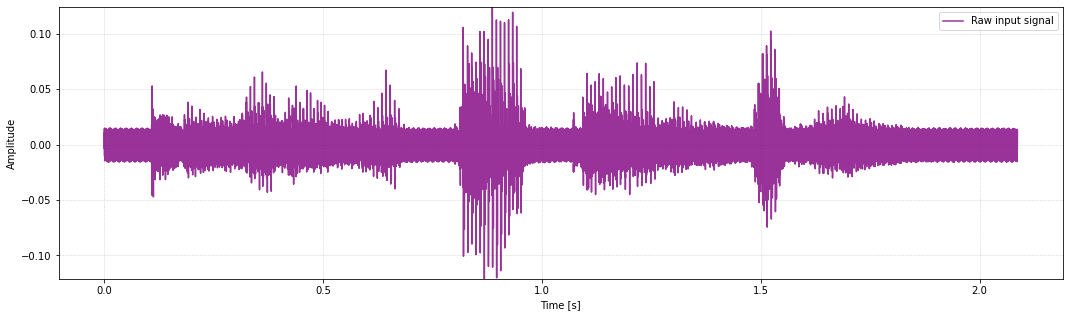

In [9]:
plt_signal(signal, Fs=Fs, title="Raw input signal", x_axis='time')

In [10]:
Audio(signal, rate=Fs)

# 2 Preprocessing and framing
    2.1. Mean the input signal by subtracting the mean value
    2.2. Normalize the input signal to the dynamic range [-1, 1]
         by dividing by the maximum of the absolute value of the signal.
    2.3. Divide signal into frames with length of 1024 samples and aliasing of 512 samples,
         store frames into columns of the matrix.
    2.4. Chose "beautiful" frame with periodic character and
         plot it with the time axis in seconds

If signal has length >= 1, then
N_frames = 1 + \floor{N-l_frame}{s_frame}
where l_frame is length of each frame,
and s_frame is number overlapping elements


time interval: (0.864, 0.9279375)


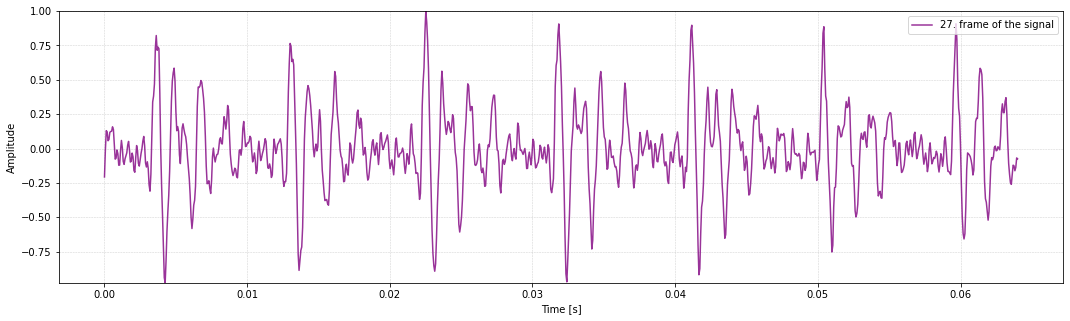

In [11]:
def absmax(y):
    return np.max(np.abs(y))

def mean_and_normalize(arr):
    return (arr - np.mean(arr)) / absmax(arr)

# Inspired by 
# https://towardsdatascience.com/advanced-numpy-master-stride-tricks-with-25-illustrated-exercises-923a9393ab20
# https://www.fit.vutbr.cz/study/courses/ZRE/public/prede/03_prepro_model_ceps/03_prepro_model_ceps.pdf
def make_overlapping_frames(arr, row_len=1024, overlap=None):
    overlap = row_len//2 if overlap == None else overlap
    # $N_{row} = 1 + \floor{\frac{len(arr) - row\_len}{overlap}}$
    N_row = 1 + np.floor((len(arr) - row_len) / overlap).astype(np.int64)
    strides = (overlap * arr.itemsize, arr.itemsize)

    return np.lib.stride_tricks.as_strided(
        arr,
        shape=(N_row, row_len),
        strides=strides
    )

def chose_beautiful_frame(arr: np.array):
    magic_index = 27
    return arr[magic_index], magic_index


signal = mean_and_normalize(signal)

frames = make_overlapping_frames(signal)
frame, magic_index = chose_beautiful_frame(frames)

plt_signal(frame, Fs=16000, title='27. frame of the signal', x_axis='time')
print(f"time interval: {512 * 27 / 16000, ((512 * 28 + 512) -1)/ 16000}")


In [12]:
Audio(frame, rate=Fs)

# 3. DFT:
    3.1. Implement your own DFT function for N=1024 samples. 
         Use the transformation for the chosen signal frame.
    3.2. Show the MODULE of DFT for frequencies 0..F_s/2 with frequency axis in Hz
    3.3. Compare the result with np.fft.fft
    3.4. Graphically np.allclose()

In [13]:
def create_DFT_mat(N: int=1024):
    N_2: int = N>>1
    N_2neg: int = -N_2
    jomega: float = 1j * np.pi / N_2neg
    return (np.fromfunction(
            lambda k, n: np.exp(jomega * k * n), (N_2 + 1, N),
            dtype="complex128")
    )

def dft(frames, N=1024):
    DFT_mat2 = create_DFT_mat(N)
    def _dft(signal):
        res = np.dot(DFT_mat2, signal)
        res = np.concatenate((res, np.flip(res)[1:len(res)-1]))
        return res
    return np.apply_along_axis(_dft, -1, frames)

True

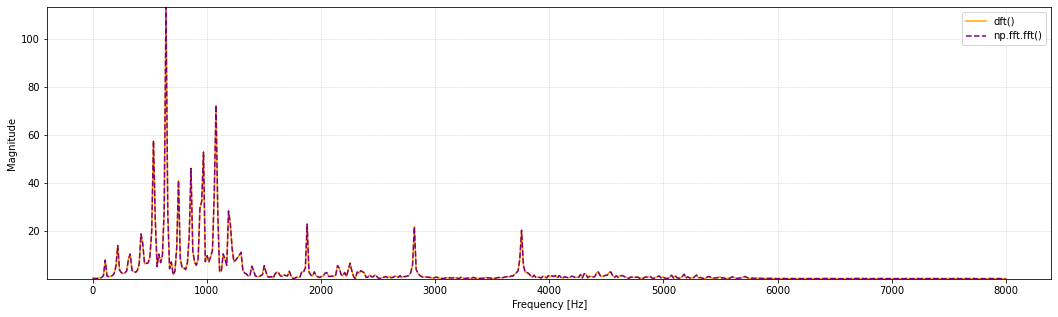

In [14]:
frame_dft = dft(frame)
frame_dft_abs = np.absolute(frame_dft[:len(frame_dft)>>1])
frame_fft = np.fft.fft(frame)
frame_fft_abs = np.absolute(frame_fft[:len(frame_dft)>>1])

plt_2_signals(sig1=frame_fft_abs, title1="dft()", sig2=frame_dft_abs, title2="np.fft.fft()", Fs=Fs>>1, x_axis='freq')
np.allclose(frame_fft_abs, frame_dft_abs)

# Spectrogram:
    4.1  For the whole signal compute and plot log power spectrogram
         e.g a plot with time in seconds on the x axis and frequency in Hz
         on the y axis. Again, tho the half of sampling frequency F_s/2
    4.2  use the length of the window 1024 samples and overlapping 512 samples.
    4.3  Values of DFT coefficients modify with P[k] = 10log_10( abs(x[k])**2 )
    4.4  You can use a library function, but time and frequency axises
         must have the right values. You can use grayscale or color.

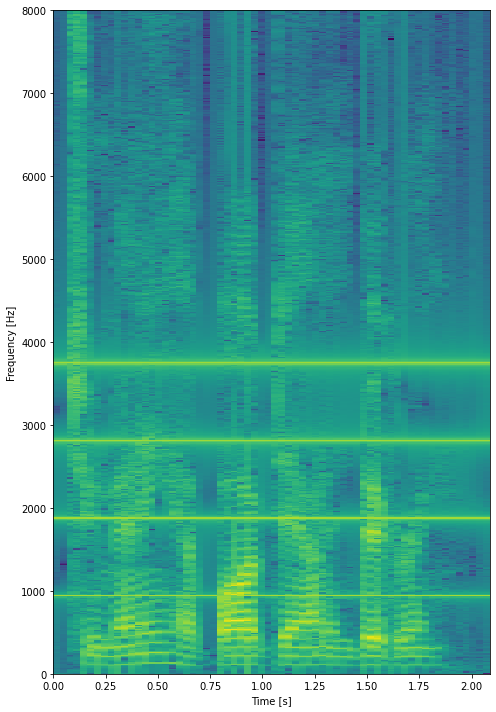

In [15]:
def create_spectrogram(signal, NFFT=1024, noverlap=None, Fs=16000):
    def shorten(arr):
        newlen = 1 + (len(arr)//2)
        return arr[:newlen]
    overlap = NFFT >> 1 if noverlap == None else noverlap

    normalized = mean_and_normalize(signal)
    frames = make_overlapping_frames(normalized, NFFT, overlap)
    
    transformed = dft(frames, N=NFFT)

    freq_half = np.apply_along_axis(shorten, -1, transformed)

    t = np.linspace(0, (len(signal)/Fs), num=freq_half.shape[0])
    f = np.linspace(0, Fs>>1, num=freq_half.shape[1])

    return (f, t, (np.absolute(freq_half) ** 2).T)

def spectrogram(signal, Fs=16000, NFFT=1024, noverlap=512):
    overlapping = NFFT//2 if noverlap == None else noverlap

    f, t, sgr = create_spectrogram(signal, NFFT=NFFT, noverlap=noverlap)
    sgr = 10 * np.log10(sgr+1e-20)

    fig, ax = plt.subplots(figsize=(7, 10))
    ax.imshow(sgr, interpolation='nearest', aspect='auto', 
              origin='lower', extent=[0, len(signal)/Fs,0, Fs/2]
    )

    fig.gca().set_xlabel('Time [s]')
    fig.gca().set_ylabel('Frequency [Hz]')
    fig.tight_layout()
    savefig("spectrogram")

spectrogram(signal, NFFT=1024, Fs=Fs) # better



#Finding cosines frequencies:

In [16]:
def main(frames):
    N = 1024
    freq_res = Fs / N
    def find_frequencies(frames):
        threshold = 20
        frame0 = np.abs(dft(frames[0]))[:N//2]
        
        indices = np.argwhere(frame0 > 20).ravel()
        frequencies = (freq_res * np.argwhere(frame0 > threshold)).ravel()
        magnitudes = frame0[(frequencies/freq_res).astype(np.int64)]

        return indices, frequencies, magnitudes

    indices, frequencies, magnitudes = find_frequencies(frames)
    

    cosines = np.zeros(N//2)
    cosines[indices] = magnitudes
    return indices, indices * freq_res, cosines

indices, frequencies, cosines = main(frames)
print(f'cosines magnitudes:\n\t{cosines[indices]}')
print(f'indices:\n\t{indices}')
print(f'frequencies:\n\t{frequencies}')


cosines magnitudes:
	[23.50015756 23.03067986 21.75406458 20.54443526]
indices:
	[ 60 120 180 240]
frequencies:
	[ 937.5 1875.  2812.5 3750. ]


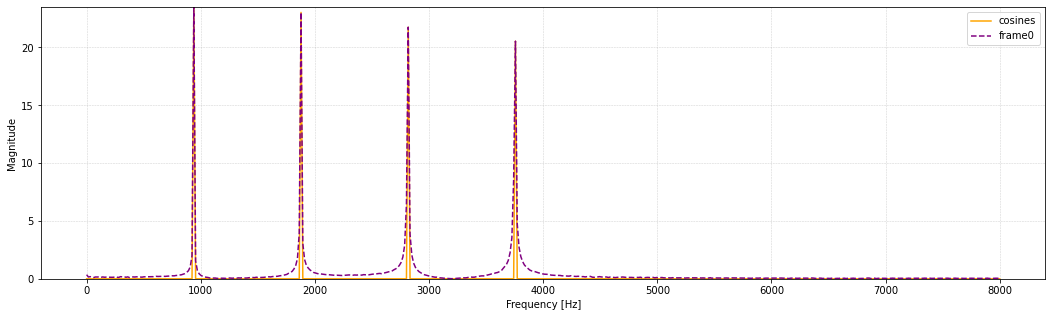

In [17]:
def main(cosines, time_frame0):
    frame0 = dft(time_frame0)
    frame0 = np.abs(frame0)[:len(frame0)//2]

    plt_2_signals(sig1=cosines, title1="cosines", sig2=frame0, title2="frame0", x_axis="freq", Fs=8000)

main(cosines, frames[0])

## Generate cosines

colors ['cyan', 'purple', 'orange']


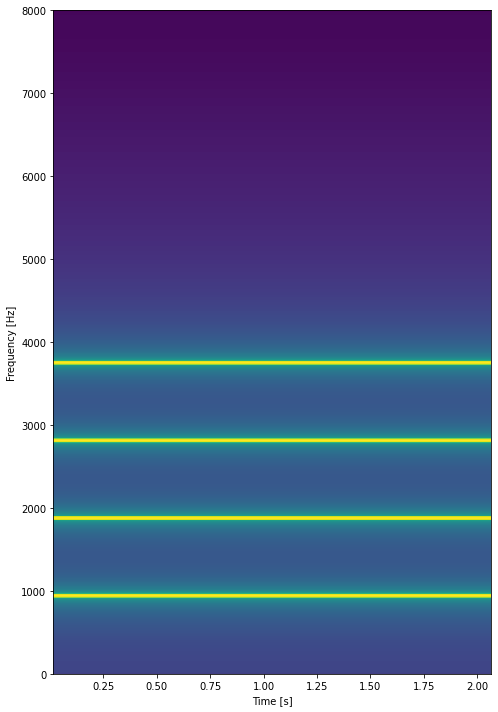

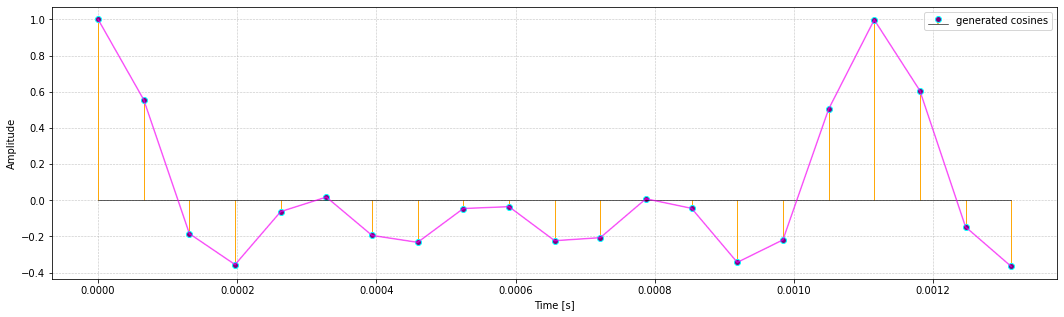

In [18]:
N = 1024
Fs = 16000
def generate_cosines_approx(indices, samples):
    freq_res = Fs / N
    PIPI = np.pi + np.pi
    omegas = PIPI * indices*freq_res

    time = np.arange(samples)/Fs

    cosines_sum = np.zeros(time.shape)
    for i in range(1, 5):
        cosines_sum += np.cos(time * omegas[i-1])
    
    return cosines_sum

samples = len(signal)
generated_basic_cosines = generate_cosines_approx(indices, samples)
fig, ax = plt.subplots(figsize=(7,10))

fig.gca().set_xlabel('Time [s]')
fig.gca().set_ylabel('Frequency [Hz]')
fig.tight_layout()

ax.specgram(generated_basic_cosines, Fs=Fs, NFFT=1024, noverlap=512)
savefig("cosines_spectrogram")


generated_basic_cosines = mean_and_normalize(generated_basic_cosines)

fig, ax = plt.subplots(figsize=figsize_for_discrete_cosines)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
plt_discrete_cosines(generated_basic_cosines[:discrete_cosines_samples_to_plot],
                     label='generated cosines', n=discrete_cosines_samples_to_plot
)
savefig('generated_cosines_basic')


In [19]:
import scipy.io.wavfile

scipy.io.wavfile.write("../audio/4cos.wav", Fs, (generated_basic_cosines * np.iinfo(np.int16).max).astype(np.int16))
Audio((generated_basic_cosines * np.iinfo(np.int16).max).astype(np.int16), rate=16000)

# Filter implementation:

## Filter creatinon, impulse response

[ 937.5 1875.  2812.5 3750. ]


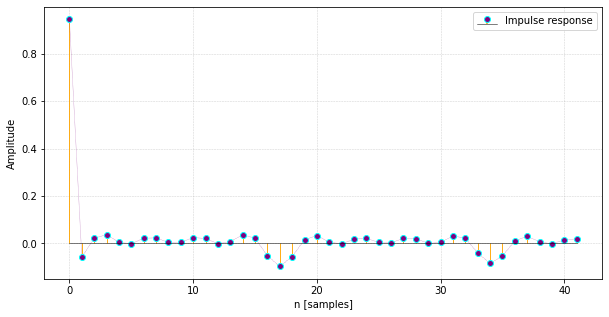

In [20]:
# cosines = frequencies
print(frequencies)

def ba_filter(freqs_to_filter, fs=16000, wpr=25, wsr=15): #b,a
    def butter_bandstop_ba(freq, fs=fs, ord=2, wpr=wpr, wsr=wsr):
        nuq = fs / 2 # Nuquist frequency
        wp = np.array([freq-wpr, freq+wpr]) / nuq
        ws = np.array([freq-wsr, freq+wsr]) / nuq
        
        _, wn = scipy.signal.buttord(wp=wp, ws=ws,
                                     gpass=3.0, gstop=40.0
        )
        return scipy.signal.butter(ord, Wn=wn, 
                                   btype='bandstop',
                                   output='ba')

    b, a = butter_bandstop_ba(freqs_to_filter[0], fs=Fs)
    for i in range(1, len(freqs_to_filter)):
        bt, at = butter_bandstop_ba(freqs_to_filter[i], Fs)
        b = np.convolve(b, bt)
        a = np.convolve(a, at)

    return b, a

def main(frequencies):
    Fs = 16000
    b, a = ba_filter(frequencies, fs=Fs)

    system = scipy.signal.dlti(b, a)
    t, y = scipy.signal.dimpulse(system, n=42)

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1,1,1)
    (markers, stemlines, baseline) = plt.stem(t, np.squeeze(y), label='Impulse response')
    plt.setp(stemlines, linestyle='-', color='orange', linewidth=0.9)
    plt.setp(baseline, linestyle='-', color='black', linewidth=0.5)
    plt.setp(markers,markeredgecolor='cyan', linestyle='dotted', color='purple', linewidth=0.4)
    plt.grid(alpha=0.6, linestyle='--', linewidth='0.5')
    plt.legend(loc='upper right')
    plt.xlabel('n [samples]')
    plt.ylabel('Amplitude')
    savefig("Impulse_Response")

    return b, a

b, a = main(frequencies)

## Frequency characteristics

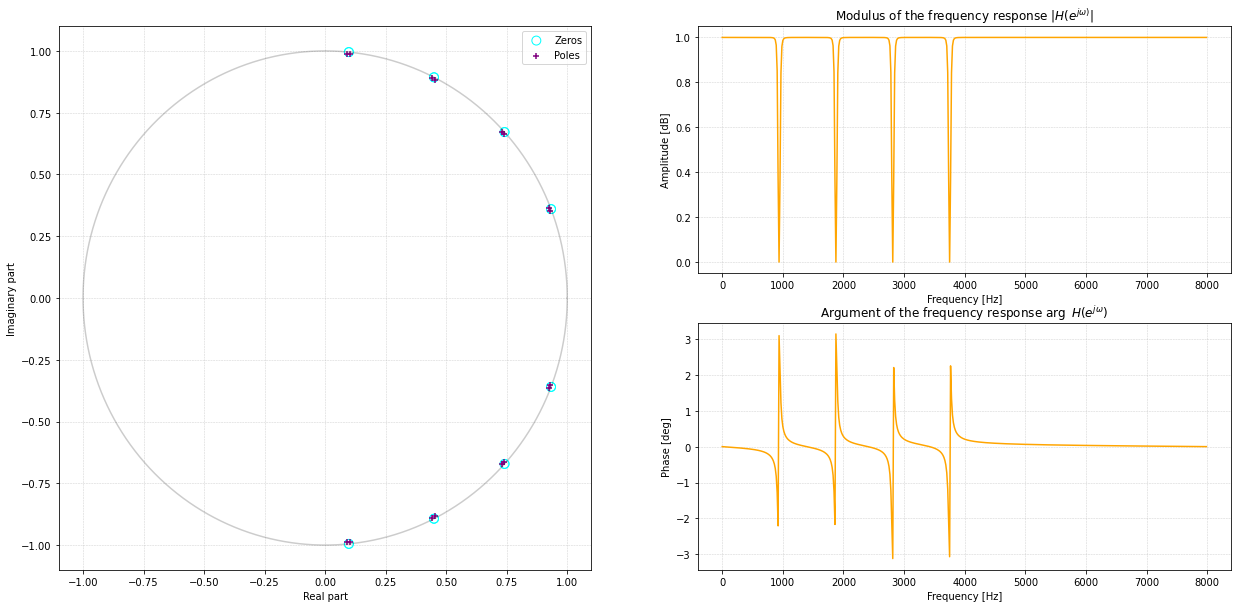

In [21]:

def main(b, a):
    N = 1024
    z = np.roots(b)
    p = np.roots(a)
    w, h = scipy.signal.freqz(b, a)
    ang = np.linspace(0, 2*np.pi, N)

    fig = plt.figure(figsize=(21, 10))
    #fig.suptitle('Pole-Zero Plot and Zero-Phase responce of the filter')
    #---------
    ax = fig.add_subplot(1, 2, 1)
    # Pole-Zero Plot
    ax.plot(np.cos(ang), np.sin(ang), c='k', alpha=0.2, marker='')
    ax.scatter(np.real(z), np.imag(z),
            marker='o',s=80, facecolors='none',
            edgecolors='cyan',
            label='Zeros')
    ax.scatter(np.real(p), np.imag(p),
            marker='+', color='purple',
            label='Poles')
    ax.grid(alpha=0.6, linestyle='--', linewidth='0.5')
    ax.set_xlabel('Real part')
    ax.set_ylabel('Imaginary part')
    ax.legend(loc='upper right')
    #-------- Frequency response
    ax = fig.add_subplot(2,2,2)
    ax.plot(w / 2 / np.pi * Fs, np.abs(h), color='orange')
    ax.grid(alpha=0.6, linestyle='--', linewidth='0.5')
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Amplitude [dB]')
    ax.set_title('Modulus of the frequency response $|H(e^{j\\omega)}|$')
    #------- Phase response
    ax = fig.add_subplot(2,2,4)
    ax.plot(w / 2 / np.pi * Fs, np.angle(h), color='orange')
    ax.grid(alpha=0.6, linestyle='--', linewidth='0.5')
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Phase [deg]')
    ax.set_title('Argument of the frequency response $\\arg{~H(e^{j\\omega})}$')
    #
    savefig("Frequency_Characteristics")
    
main(b, a)

## Zero-phase response

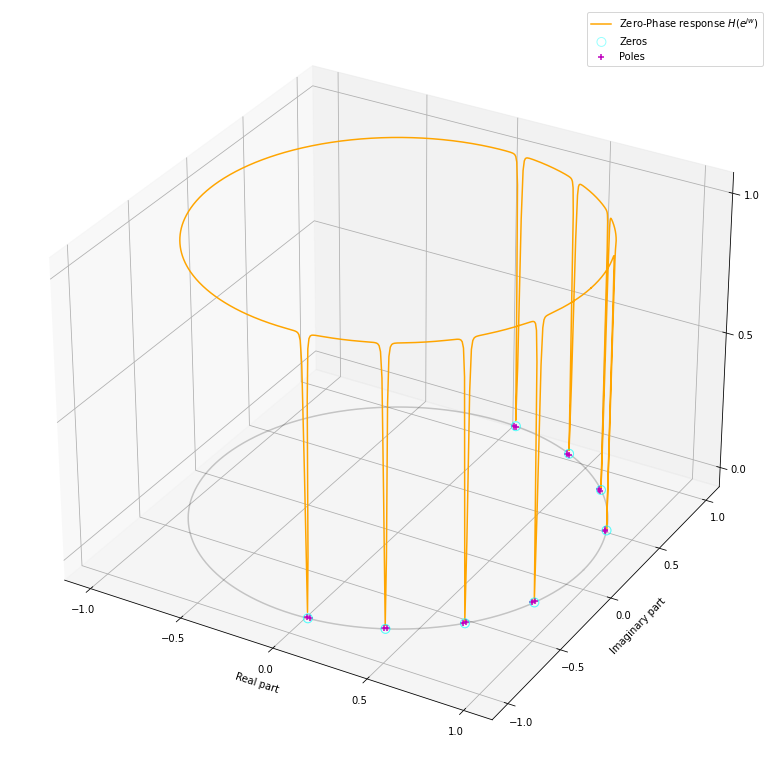

In [22]:

# Zero-phase responce of the filter around the whole unit circle.
# $H_{(e^{jw})} = H_r(z)|z=e{jw}$
def ba2zphr(b, a, N=512):
    def H(ejw, b, a):
        K, M = len(b), len(a)
        b_s = np.dot(b, ejw **(-1*np.linspace(0, K-1, K)))
        a_s = np.dot(a, ejw **(-1*np.linspace(0, M-1, M)))
        return b_s / a_s
    
    ejws = np.exp(1j * np.linspace(0, 2*np.pi, N))
    zphrs = np.zeros(N, dtype='complex128')
    for i, ejw in enumerate(ejws):
        zphrs[i] = H(ejw, b, a)
    return zphrs, ejws

def main(b, a):
    N = 1024
    zpr, ejws = ba2zphr(b, a, N)
    ang = np.linspace(0, 2*np.pi, N)
    z, p = np.roots(b), np.roots(a)


    fig = plt.figure(figsize=(14, 14))
    ax = fig.add_subplot(1, 1, 1,
                        projection='3d', alpha=0.1,
                        label='Zero-Phase response of the filter'
    )

    ax.plot3D(
        np.cos(ang), np.sin(ang),
        c='k', alpha=0.2
    )

    # ax.plot3D(
    #     np.real(ejws), np.imag(ejws), np.real(zpr), 
    #     color='cyan', label='real(Zero-Phase response $H(e^{jw})$)'
    # )
    ax.plot3D(
        np.real(ejws), np.imag(ejws), np.abs(zpr), 
        color='orange', label='Zero-Phase response $H(e^{jw})$'
    )
    # ax.plot3D(
    #     np.real(ejws), np.imag(ejws), np.imag(zpr), 
    #     color='magenta', label='imag(Zero-Phase response $H(e^{jw})$)'
    # )

    ax.scatter(
        np.real(z), np.imag(z),
        s=80,
        marker='o', edgecolors='cyan', alpha=0.4, facecolors='none',
        label='Zeros'
    )
    ax.scatter(
        np.real(p), np.imag(p),
        s=40,
        marker='+', color='m', alpha=1,
        label='Poles'
    )
    ax.legend(loc='upper right')
    ax.set_xlabel('Real part')
    ax.set_ylabel('Imaginary part')
    plt.draw()  # needed to populate xticks with actual labels
    ticks = np.linspace(-1, 1, 5)
    plt.xticks(ticks)
    plt.yticks(ticks)
    ax.set_zticks(np.linspace(0,1,3))
    plt.grid(alpha=0.6, linestyle='--', linewidth='0.5')


    savefig("Zero-Phase response")

main(b, a)

## Filtering

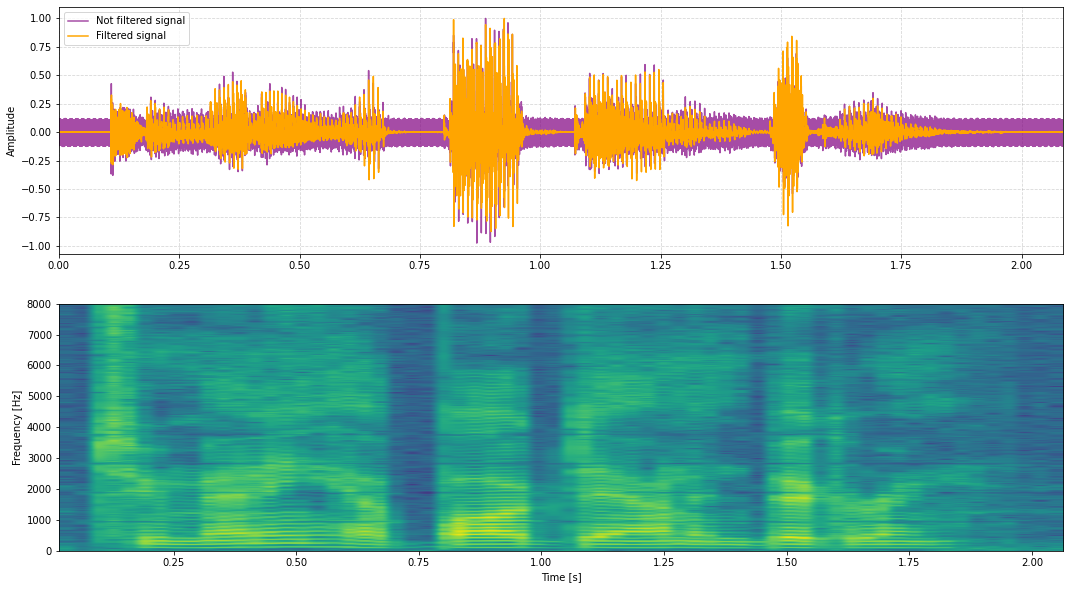

In [23]:
#------------------------------------------------------------------------

def filter_signal(signal, b, a):
    y = signal

    for i in range(2):
        y = scipy.signal.lfilter(b, a, y)

    for i in range(850):
        y[i] = y[len(y)-i-1]

    y = (y-y.mean()) / absmax(y)

    return y

filtered_signal = filter_signal(signal, b, a)

fig, ax = plt.subplots(2, figsize=(18,10))
time = np.linspace(0, len(signal)/Fs, num=len(signal))
ax[0].set_xlim(0, len(signal)/Fs)

ax[0].plot(time, signal,
        alpha=0.7, c='purple',
        label='Not filtered signal'
)
ax[0].plot(time, filtered_signal,
        alpha=1, c='orange', label='Filtered signal'
)

ax[0].set_ylabel('Amplitude')
ax[1].set_ylabel('Frequency [Hz]')
ax[0].grid(alpha=0.5, linestyle='--')
ax[1].set_xlabel('Time [s]')
ax[1].specgram(filtered_signal, NFFT=1024, noverlap=512, Fs=Fs)
ax[0].legend(loc='upper left')
savefig("Filtered_Signal")


In [24]:
scipy.io.wavfile.write("../audio/clean_bandstop.wav", Fs, (filtered_signal * np.iinfo(np.int16).max).astype(np.int16))
Audio(filtered_signal, rate=16000)


# Bonus:

## Find precise frequencies

In [25]:
def pad_with_0(a, N):
    padded_vector = a.flatten()
    padded_vector = np.pad(
        padded_vector,
        (0, N-len(padded_vector)),
        'constant',
        constant_values=(0,0),
    )
    return padded_vector



def get_novoice_frames(frames):
    nv_i = np.array([0, 1, 22, 23, 58, 59, 60, 61,  62, 63])
    nvf = np.array([ frames[i] for i in nv_i ])
    return nvf

def peaks_mean(peaks):
    range = np.arange(len(peaks)) + 1
    den = (range).sum()
    first_peak_mean = peaks.sum() / den
    return range * first_peak_mean


def get_precise_frequencies(index, freq_res, frame):
    jomega = (1j * 2 * np.pi)
    N = 16000
    k_from = np.floor((index-1)*freq_res).astype(np.int64)
    k_to = np.floor((index+1)*freq_res).astype(np.int64)
    n_from = 0
    n_to = N
    
    n = np.arange(n_from, n_to)

    k = np.linspace(k_from, k_to, num=k_to-k_from+1)
    nk = (n * k[:, None])
    freqmat = np.exp(-jomega * nk / N)

    padded_vector = pad_with_0(frame, N)
    precise_amplitudes = freqmat @ padded_vector
    precise_magnitudes = np.abs(precise_amplitudes)


    # offset in k_from
    offset = (np.where(precise_magnitudes == precise_magnitudes.max()))[0][0]
    z_amplitude = precise_amplitudes[offset]

    precise_freq = k_from + offset
    return precise_freq, z_amplitude



def main(frames):
    N = 1024
    freq_res = Fs / N # a frequency resolution.
    precise_z = np.zeros(4, dtype='complex128')
    frame = frames[0]

    complex_acc = np.zeros(4, dtype=np.complex128)
    freq_acc = np.zeros(4, dtype=np.float64)
    _frqs = np.zeros(4, dtype=np.float64)
    for j, frame in enumerate(get_novoice_frames(frames)):
        for i in range(0, 4):
            _frqs[i], pz = get_precise_frequencies(indices[i], freq_res, frame)
            if (i + 1) % 4 == 0:
                freq_acc += _frqs
            
    precise_frequencies = peaks_mean(freq_acc/len(get_novoice_frames(frames)))

    return precise_frequencies


precise_frequencies = main(frames)

print("precise_frequecies: ", precise_frequencies)
print('done')

precise_frequecies:  [ 936.3 1872.6 2808.9 3745.2]
done


## Determine amplitudes

In [26]:

def determine_amplitudes(novoice_frames, N=1024):
    freq_res = Fs / N
    def per_frame_amplitudes(novoice_frame, N):
        z_amplitudes = np.zeros(4, dtype='complex256')
        for i in range(4):
            _, zx = get_precise_frequencies(indices[i], freq_res, novoice_frame)
            z_amplitudes[i] = zx
        magnitudes = (np.abs(z_amplitudes) * 2.0) / N
        print("amplitudes: ", magnitudes)
        return magnitudes

    sum = np.zeros(4)
    for frame in novoice_frames:
        sum += per_frame_amplitudes(frame, N).ravel()
    
    mean = sum / len(novoice_frames)
    return mean

def main(frames):
    nvf = get_novoice_frames(frames)
    amplitudes = determine_amplitudes(nvf)
    return amplitudes

#[0.04643095 0.0464185  0.04637567 0.04646879]
precise_amplitudes = main(frames)
print(f'precise_amplitudes:\n\t{precise_amplitudes}')


amplitudes:  [0.04629901 0.04649447 0.04638875 0.04639494]
amplitudes:  [0.04637152 0.04644296 0.04655886 0.0465608 ]
amplitudes:  [0.04655741 0.04623903 0.04633251 0.0462981 ]
amplitudes:  [0.04662883 0.04629619 0.04650499 0.04634567]
amplitudes:  [0.04647638 0.0464264  0.04626097 0.04649983]
amplitudes:  [0.04616324 0.04651684 0.04657824 0.04634648]
amplitudes:  [0.04618946 0.04659836 0.04650509 0.04640782]
amplitudes:  [0.04648745 0.04660216 0.04648748 0.0465318 ]
amplitudes:  [0.04653596 0.04647878 0.04669092 0.04643419]
amplitudes:  [0.04646661 0.0463092  0.0466226  0.04633931]
precise_amplitudes:
	[0.04641759 0.04644044 0.04649304 0.04641589]


## Phases

In [27]:

def determine_phases(frames, frequencies, indices):
    PIPI = np.pi + np.pi 
    fs = 16000
    freq_res = fs/1024 # resolution
    omegas = ((frequencies * PIPI) / fs)

    phases = np.zeros(4, dtype=np.float128)
    dft_Xs = np.zeros(4, dtype='complex128') # dft coefficients - accumulator
    
    frame = frames[0]

    omega512 =  omegas * 512
    for i in range(4):
        dft_Xs[i] = get_precise_frequencies(indices[i], freq_res, frame)[1]
                    
    angles = np.angle(dft_Xs)
    phases += angles

    precise_phases = (phases + np.pi) % (PIPI) - np.pi
    return precise_phases


#:[-2.34367807 -0.94666949 -2.85470679 -2.29635452]
print('precise frequencies', precise_frequencies)

p60 = determine_phases(frames, precise_frequencies, indices)

print("60", p60)
precise_phases = p60

print(f'precise_phases\n\t:{precise_phases}')
#precise_phases = np.array([-2.34367807, -0.94666949, -2.85470679, -2.29635452])
#[-2.24926133 -1.06322977 -2.773656   -2.22532775]


precise frequencies [ 936.3 1872.6 2808.9 3745.2]
60 [-2.24926133 -1.06322977 -2.773656   -2.22532775]
precise_phases
	:[-2.24926133 -1.06322977 -2.773656   -2.22532775]


## Generating precise cosine signal

colors ['cyan', 'purple', 'orange']
colors ['cyan', 'purple', 'orange']
1.361388048934979e-05


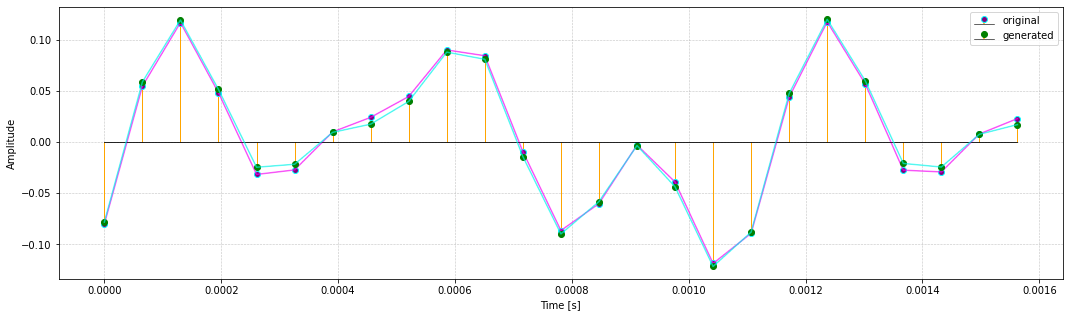

In [35]:
def generate_4_cosines(amplitudes, frequencies, phis, samples, fs=16000):
    time = np.linspace(0, samples/fs, num=samples)
    times = np.array([time, time, time, time])
    PIPI = np.pi * 2
    omegas = frequencies * PIPI

    for i in range(4):
        times[i] = times[i] * omegas[i] # \omega * x
        times[i] = times[i] + phis[i] # \omemga * x + \phi
        times[i] = np.cos(times[i]) # cos(\omega * x + \phi)
        times[i] = times[i] * amplitudes[i] # cos(\omega*x + \phi)
    
    return time, times


def get_cosines(amplitudes, frequencies, phases, samples):
    time, gen_cosines = generate_4_cosines(amplitudes=amplitudes,
                    frequencies=frequencies,
                    phis=phases,
                    samples=samples
    )

    cossum = np.array(gen_cosines[0]
                      + gen_cosines[1]
                      + gen_cosines[2]
                      + gen_cosines[3]
                     )
    return cossum
    
    
generated = get_cosines(precise_amplitudes, precise_frequencies, 
                 precise_phases,
                 len(signal))

fig, ax = plt.subplots(1, figsize=figsize_for_discrete_cosines)

ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
discrete_cosines_samples_to_plot = 25
plt_discrete_cosines(signal[:200], label='original', n=discrete_cosines_samples_to_plot)
plt_discrete_cosines(generated[:200], label='generated',n=discrete_cosines_samples_to_plot,
                     lineclr='cyan', markerclr='g', markeredgclr='g',
                     #linealpha=1,
                     )

savefig('generated_cosines_precise')


mse = ((frames[0]-generated[:1024])**2).sum()/1024 
print(mse)
subtracted = signal-generated

subtracted = mean_and_normalize(subtracted)


scipy.io.wavfile.write("../audio/bonus.wav", Fs, (subtracted * np.iinfo(np.int16).max).astype(np.int16))
Audio(subtracted, rate=16000)


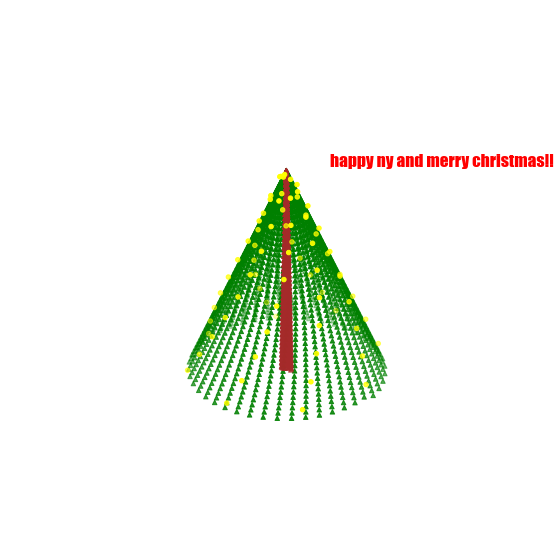

In [29]:



k=500
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection="3d")

k=300
num = k*7
Z = np.linspace(0, k, num=num)
#[i for i in range(k)]

a = -1*np.linspace(0, k, num=num) +k
X = np.cos(np.linspace(0, k, num=num))*a
Y = np.sin(np.linspace(0, k, num=num))*a 
ax.scatter(X,Y,Z, c="green", marker="^")

a = -1*np.linspace(0, k, num=num) + k
X = np.cos(np.linspace(0, k, num=num))*a/20
Y = np.sin(np.linspace(0, k, num=num))*a/20
ax.scatter(X,Y,Z, c="brown", marker="^")


k=300
step = 4
Z = [i for i in range(1,k,step)]
X = [np.cos(i/5+2)*(k-i+10) for i in range(1,k,step)]
Y = [np.sin(i/5+2)*(k-i+10) for i in range(1,k,step)]

ax.scatter(X,Y,Z, c="yellow", marker="o")
ax._axis3don = False

ax.text(100, 80, 300, "happy ny and merry christmas!!", color='red', fontfamily='fantasy', fontsize='xx-large')

plt.xlim(-500,500)
plt.ylim(-500,500)
plt.show()
